 # Please upvote if you like this kernel for further encouragement

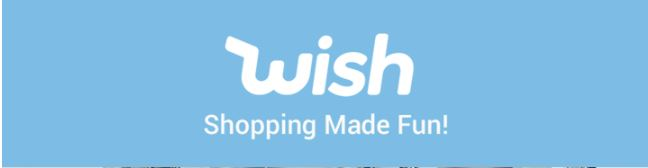

**In this Note book I have used Pandas profiling which provides analysis like type, unique values, missing values, quantile statistics, mean, mode, median, standard deviation, sum, skewness, frequent values, histograms, correlation between variables, count, heatmap visualization, etc. It is an approach whereby our EDA approach has been boosted with just a single line of code!!**

AS we all know that to built a recommender system we should have customer as well as product ID with its rating. But in this dataset Customer ID is not given.

**Problem statement is - How to build a Recommender system without audience data.**

In [ ]:
!pip install dexplot
!pip install chart_studio
!pip install pandas-profiling

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
import dexplot as dxp
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

import seaborn as sns
from pandas_profiling import ProfileReport
import pandas_profiling
import plotly.express as px

In [ ]:
df = pd.read_csv('../input/sales-modified/summer-products-with-rating-and-performance_2020-08.csv')
df.describe()

In [ ]:
pandas_profiling.ProfileReport(df)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

I have made recommendation Engine by changing few things in dataset as we know, **A recommendation engine is only as “intelligent” as the data allows. **
Data Preparation - 
1) The product_id is in alpha numeric here I suggest to make it integer which willl help company to work on many aspects like how i suffered here to make it possible I changed my product_id to integer using excel functionalities like pivot.
2) Added anpther column named as order.
The reason here is - we grab the unique order IDs where the product passed into the function was part of the order With the applicable order IDs, it becomes a straightforward process to get all rows in order excluding those for the product that was passed in. This represents all OrderProduct instances of items bought in conjunction with the product by product ID.

In [ ]:
def get_recommendations(id):    
    sales=pd.read_csv("../input/sales-modified/summer-products-with-rating-and-performance_2020-08.csv")
    sales.head(2)
    
    orders_for_product = sales[sales.product_id == 548 ].Order.unique()
    
    relevant_orders = sales[sales.Order.isin(orders_for_product)]
    
    accompanying_products_by_order = relevant_orders[relevant_orders.product_id != 548]
    num_instance_by_accompanying_product = accompanying_products_by_order.groupby(548)[548].count().reset_index(name='instances')
    
    num_orders_for_product = orders_for_product.size
    product_instances = pd.DataFrame(num_instance_by_accompanying_product)
    product_instances['frequency'] = product_instances['instances']/num_orders_for_product
    
    recommended_products = pd.DataFrame(product_instances.sort_values('frequency', ascending=False).head(3))
    
    products = pd.read_csv("../input/sales-modified/summer-products-with-rating-and-performance_2020-08.csv")
    recommended_products = pd.merge(recommended_products, products, on='product_id')

**Conclusion
To give some perspective on what this looks like, let’s consider the output from passing the value 548 (as the product ID) to this function. Keep in mind that product ID 548 represents a product named t-shirt, so what we expect is the data to tell us which products have previously been bought in conjunction with a t-shirt.

**So we can roughly conclude that (in this small sample set) cleats and a t-shirt jeans are the most popular purchases made along with a t-shirt.****
